In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

In [2]:
saturation = False
confinement = False

P = 60000000       # population
t = 100000         # taille de confinement
if confinement: P = t
N0 = 9043          # malades au début du confinement
E = 1              # personnes en contact par malade

In [3]:
#statistiques bing 
data1 = [9043,10995,12612,14459,16018,19856,22304,25233,29155,37611]
data2 = [148, 372, 450, 562, 674, 860,1100,1331,1696,1995,2314]
data3 = [12,12,1300,1587, 2200, 2200, 3281,3900,4948,5700]

In [4]:
taux_infection = [(a-b)/b for a,b in zip(data1[1:],data1[:-1])]
taux_décès = [a/b for a,b in zip(data2,data1)]
taux_guérison = [a/b for a,b in zip(data3,data1)]

print('Statistiques :')
print('- malades',data1)
print('- morts',data2)
print('- guéris',data3)

Statistiques :
- malades [9043, 10995, 12612, 14459, 16018, 19856, 22304, 25233, 29155, 37611]
- morts [148, 372, 450, 562, 674, 860, 1100, 1331, 1696, 1995, 2314]
- guéris [12, 12, 1300, 1587, 2200, 2200, 3281, 3900, 4948, 5700]


In [5]:
print('\nEvolution taux infection',taux_infection)


Evolution taux infection [0.21585756939068892, 0.1470668485675307, 0.14644782746590548, 0.1078221177121516, 0.2396054438756399, 0.1232876712328767, 0.13132173601147776, 0.1554313795426624, 0.2900360144057623]


In [6]:
# taux
offset = -1
N = data1[offset-1]      # malades hier
print('\nEstimation à partir des chiffres du jour',offset)  # -1 : aujourd'hui
print('Nombre de malades jour d\'avant :',N)

p = taux_infection[offset]    # taux d'infection
d = taux_décès[offset]        # taux de décès
g = taux_guérison[offset]     # taux de guérison
print('Taux :')
print('- infection :', '{:1.2f}%'.format(p*100))
print('- décès :', '{:1.2f}%'.format(d*100))
print('- guérison :', '{:1.2f}%'.format(g*100))


Estimation à partir des chiffres du jour -1
Nombre de malades jour d'avant : 29155
Taux :
- infection : 29.00%
- décès : 5.30%
- guérison : 15.16%


In [7]:
def nextday(N):
    global P, p, saturation
    if saturation : p = 0; return N
    return int(N*(1+E*p))
print('Nombres de malades :')
print('- hier :',N)
nxtd = nextday(N)    # aujourd'hui
print('- aujourdhui :',nxtd)
demain = nextday(nxtd)     # le lendemain
print('- demain :',demain)

Nombres de malades :
- hier : 29155
- aujourdhui : 37611
- demain : 48519


In [8]:
def evolution(ndays):
    global N,P,saturation  #,E,p,d,g
    n =[N,]    # nombre de malades
    m = [0,]   # morts par jour
    s = [0,]   # guérisons par jour
    c = [0,]   # cas de contamination par jour
    pol = [P,] # évolution population
    lastN = N  # malades du jour
    decompte = 0  # morts + guéris
    for i in range(ndays):
        if N < 1 : break            # si plus de malades, fin de l'épidémie
        #ni = P*(1 - N/P)        #population non infectée
        m.append(int(N*d))       # évolution du nombre des morts, d:taux de décès parmi les malades
        P = P - N*(d)            # décompte des morts de la population
        pol.append(int(P))       # évolution de la population
        s.append(int(N*g))       # évolution du nombre des guéris, g:taux de guérison parmi les malades
        actif = N-decompte       # malades pouvant contaminer
        N = nextday(actif)       # malades jour suivant 
        decompte = N*(d+g)       # decompte des morts et des guéris du nombre des malades
        if N > P : N = P; saturation = True   # quand toute la population est malade     
        n.append(int(N))         # évolution du nombre des malades        
        c.append(int(N-lastN))   # évolution du nombre des contaminés par jour
        lastN = N                # malades du jour pour calcul évolution du demain
    print('Dernier jour épidémie dans',i,'jours')
    #print(n,max(n)/P)
    #print(m,max(m)/P)
    print('Total de morts :',max(np.cumsum(m)))
    return i,pol,n,m,s,c


def draw(n,m,s,pol):
    fig, ax = plt.subplots() 
    x = np.arange(len(n))
    y = n                    # évolutrion du nombre des malades
    z = np.cumsum(m)         # évolution du nombre des morts
    w = s                    # évolution du nombre des guéris
    v = pol                  # évolution de la population
    if max(n)>10e6 : plt.plot(x,v, label='total population')
    plt.plot(x,y, label='malades/jour')
    plt.plot(x,z, label='total morts')
    plt.plot(x,m, label='morts/jour')
    plt.plot(x,w, label='guéris/jour')
    ax.set_xlabel('Jours')                   
    ax.set_ylabel('dizaines de millions')
    plt.legend()
    plt.show()
    
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:1.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

def percent(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 100)

Dernier jour épidémie dans 319 jours
Total de morts : 45859345


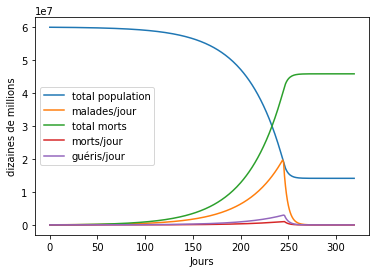

In [9]:
i,pol,n,m,s,c = evolution(1000)
cm = np.cumsum(m)    #cumul des morts sur la période
draw(n,m,s,pol)

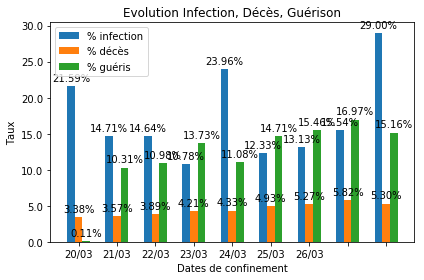

In [10]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(percent)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
x = np.arange(len(taux_infection))  
width = 0.2  # the width of the bars 
cols = ['% infection', '% décès','% guéris']
rects1 = ax.bar(x - width, taux_infection, width, label=cols[0])
rects2 = ax.bar(x , taux_décès[1:], width, label=cols[1])
rects3 = ax.bar(x + width, taux_guérison[1:], width, label=cols[2])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taux')
ax.set_xlabel('Dates de confinement')
ax.set_title('Evolution Infection, Décès, Guérison')
ax.set_xticks(x)
labels = ('20/03','21/03','22/03','23/03','24/03','25/03','26/03')
ax.set_xticklabels(labels)
autolabel(ax, rects1)
autolabel(ax, rects2)
autolabel(ax, rects3)
#fig.tight_layout()
ax.legend()
fig.tight_layout()
plt.show()

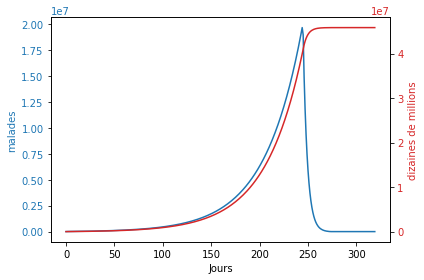

In [11]:
# evolution malades et morts
fig, ax1 = plt.subplots()
color = 'tab:blue'
x = np.arange(len(c))
y = [k*(k>=0) for k in np.cumsum(c)]
z = np.cumsum(m)
ax1.plot(x,y, label='progression malades', color=color)
ax1.set_ylabel('malades', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Jours')
#ax1.legend()
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(x,z, label='total morts', color=color)
ax2.set_ylabel('morts', color=color)
ax2.tick_params(axis='y', labelcolor=color)
if max(z)>1e7 : ax2.set_ylabel('dizaines de millions')
fig.tight_layout()
#ax2.legend()
plt.show()

In [12]:
np.cumsum(m)

array([       0,     1546,     3541,     5588,     7688,     9843,
          12054,    14323,    16651,    19040,    21491,    24006,
          26587,    29235,    31952,    34740,    37601,    40536,
          43548,    46639,    49810,    53064,    56403,    59829,
          63344,    66951,    70652,    74450,    78347,    82346,
          86449,    90659,    94979,    99412,   103961,   108628,
         113417,   118331,   123373,   128547,   133856,   139304,
         144894,   150630,   156515,   162554,   168750,   175108,
         181632,   188326,   195195,   202243,   209475,   216896,
         224511,   232325,   240343,   248570,   257012,   265674,
         274562,   283682,   293040,   302642,   312495,   322605,
         332979,   343624,   354547,   365755,   377255,   389055,
         401163,   413587,   426336,   439417,   452840,   466613,
         480746,   495248,   510128,   525396,   541063,   557139,
         573634,   590560,   607928,   625749,   644035,   662